In [5]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn import linear_model, tree, ensemble, metrics, cross_validation, externals


%matplotlib inline
plt.style.use('ggplot')

# Read Data

In [6]:
df = pd.read_csv(os.path.join('..', '..', 'data', 'adult.csv'))
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no entries that are not a number.

# Clean Data

In [9]:
df.rename(columns = {'education.num': 'education_num',
                              'hours.per.week': 'hours',
                    'marital.status': 'marital_status',
                    'capital.gain': 'capital_gain',
                    'capital.loss': 'capital_loss',
                    'native.country': 'native_country'}, inplace = True)

Variable | Type of Variable | Range of Variable
---|---|---
`age` | Continuous | 17-90
`education_num` | Categorical | 1-8
`hours_per_week` | Categorical | 1-99
`race` | Categorical | 1-5
`marital_status` | Categorical | 1: Married , 2: Unmarried
`sex` | Categorical-Binary| 1: Female , 2: Male
`salary` | Categorical-Binary | 0: <=$50,000, 1: >$50,000



In [10]:
df.shape

(32561, 15)

In [11]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'race', u'sex',
       u'capital_gain', u'capital_loss', u'hours', u'native_country',
       u'income'],
      dtype='object')

In [12]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'], dtype=object)

In [13]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'], dtype=object)

In [14]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving',
       'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [15]:
df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [16]:
df = df[(df.workclass != '?')]

In [17]:
df = df[(df.occupation != '?')]

In [18]:
df = df[(df.native_country != '?')]

In [19]:
df = df[(df.education_num >8 )]

In [20]:
df.education.unique()

array(['HS-grad', 'Some-college', 'Doctorate', 'Prof-school', 'Bachelors',
       'Masters', 'Assoc-voc', 'Assoc-acdm'], dtype=object)

Education Number | Level
---|---
`1` | Highschool Grad
`2` | Some College
`3` | Associate 1
`4` | Associate 2
`5` | Bachelors
`6` | Masters
`7` | Professional School
`8` | Doctorate


In [21]:
d = {'Private' : 1, 'Self-emp-not-inc' : 2, 'Self-emp-inc' : 3, 'Federal-gov' : 4, 'Local-gov' : 5, 
     'State-gov' : 6, 'Without-pay' : 7, 'Never-worked' : 8}
df['workclass'] = df['workclass'].map(d)
d2 = {'HS-grad' : 1, 'Some-college': 2, 'Assoc-voc' : 3, 'Assoc-acdm' : 4, 'Bachelors' : 5,
     'Masters' : 6, 'Prof-school' : 7, 'Doctorate' : 8}
df['education'] = df['education'].map(d2)
d3 = {'Married-civ-spouse' : 1, 'Divorced' : 2, 'Never-married' : 2, 'Separated' : 2,
     'Widowed' : 2, 'Married-spouse-absent' : 1, 'Married-AF-spouse' : 1}
df['marital_status'] = df['marital_status'].map(d3)
d4 = {'Tech-support' : 1, 'Craft-repair' : 2, 'Other-service' : 3, 'Sales' : 4, 'Exec-managerial' : 5,
     'Prof-specialty' : 6, 'Handlers-cleaners' : 7, 'Machine-op-inspct' : 8, 'Adm-clerical' : 9,
     'Farming-fishing' : 10, 'Transport-moving' : 11, 'Priv-house-serv' : 12, 'Protective-serv' : 13, 'Armed-Forces' : 14}
df['occupation'] = df['occupation'].map(d4)
d5 = {'Wife' : 1, 'Own-child' : 2, 'Husband' : 3, 'Not-in-family' : 4, 'Other-relative' : 5, 'Unmarried' : 7}
df['relationship'] = df['relationship'].map(d5)
d6 = {'White' : 1, 'Asian-Pac-Islander' : 2, 'Amer-Indian-Eskimo' : 3, 'Other' : 4, 'Black' : 5}
df['race'] =df['race'].map(d6)
d7 = {'Female' : 1, 'Male' : 2}
df['sex'] = df['sex'].map(d7)
d8 = {'United-States' : 1, 'Mexico' : 2, 'Greece' : 3, 'Vietnam' : 4, 'China' : 5, 'Taiwan' : 6,
       'Holand-Netherlands' : 7, 'Puerto-Rico' : 8, 'Poland' : 9, 'Iran' : 10, 'England' : 11,
       'Germany' : 12, 'Italy' : 13, 'Japan' : 14, 'Hong' : 15, 'Honduras' : 16, 'Cuba' : 17, 'Ireland' : 18,
       'Cambodia' : 19, 'Peru' : 20, 'Nicaragua' : 21, 'Dominican-Republic' : 22, 'Haiti' : 23,
       'Hungary' : 24, 'Columbia' : 25, 'Guatemala' : 26, 'El-Salvador' : 27, 'Jamaica' : 28,
       'Ecuador' : 29, 'France' : 30, 'Yugoslavia' : 31, 'Portugal' : 32, 'Laos' : 33, 'Thailand' : 34,
       'Outlying-US(Guam-USVI-etc)' : 35, 'Scotland' : 36,
       'India' : 35, 'Philippines' : 36, 'Trinadad&Tobago' : 37, 'Canada' : 38, 'South' : 39}
df['native_country'] = df['native_country'].map(d8)


In [22]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,income
1,82,1,132870,1,9,2,5,4,1,1,0,4356,18,1,<=50K
4,41,1,264663,2,10,2,6,2,1,1,0,3900,40,1,<=50K
5,34,1,216864,1,9,2,3,7,1,1,0,3770,45,1,<=50K
7,74,6,88638,8,16,2,6,5,1,1,0,3683,20,1,>50K
8,68,4,422013,1,9,2,6,4,1,1,0,3683,40,1,<=50K


# Exploratory Data Analysis

In [23]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country
count,26421.000000,26421.000000,2.642100e+04,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000
mean,38.486128,1.787782,1.881046e+05,2.760115,10.760115,1.514250,5.733318,3.496537,1.424284,1.672155,1206.437342,93.288899,41.479656,2.305439
std,12.621600,1.503404,1.046910e+05,1.929801,1.929801,0.499806,2.932182,1.458367,1.170347,0.469437,7819.503115,414.472259,11.712433,5.821822
min,17.000000,1.000000,1.376900e+04,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,28.000000,1.000000,1.169340e+05,1.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.000000,1.773980e+05,2.000000,10.000000,2.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.000000,2.349190e+05,5.000000,13.000000,2.000000,8.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,7.000000,1.484705e+06,8.000000,16.000000,2.000000,14.000000,7.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,39.000000


In [24]:
df.var()

age               1.593048e+02
workclass         2.260223e+00
fnlwgt            1.096021e+10
education         3.724134e+00
education_num     3.724134e+00
marital_status    2.498064e-01
occupation        8.597690e+00
relationship      2.126833e+00
race              1.369712e+00
sex               2.203711e-01
capital_gain      6.114463e+07
capital_loss      1.717873e+05
hours             1.371811e+02
native_country    3.389361e+01
dtype: float64

In [25]:
df["income_binary"]=1

In [26]:
df.income_binary[df.income == "<=50K"] = 0

/Users/niloo_ga/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
pd.crosstab(df.income_binary, df.sex)

sex,1,2
income_binary,,
0,7570,11568
1,1092,6191


In [28]:
11568./(7570+11568)
#60% of census data pop. are males

0.604451875849096

In [29]:
1092*1.0/(1092+7570)
#13% of women make more than $50K

0.1260678827060725

In [30]:
6191*1.0/(6191+11568)
#35% of men make more than $50K 

0.3486119713947857

In [31]:
pd.crosstab(df.income_binary, df.race)
#White : 1, Asian-Pac-Islander : 2, Amer-Indian-Eskimo : 3, Other : 4, Black : 5

race,1,2,3,4,5
income_binary,,,,,
0,16197,579,207,141,2014
1,6647,241,32,19,344


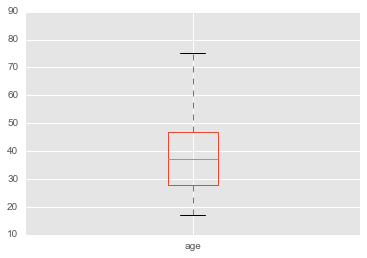

In [32]:
df.age.plot(kind = 'box')

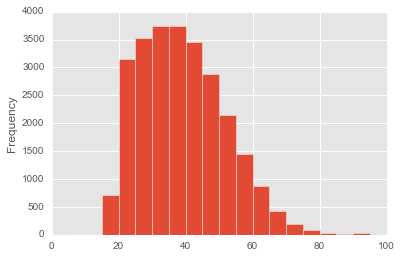

In [33]:
df.age.plot(kind = 'hist', range = (0, 100), bins = 20)

In [34]:
df.age.min()

17

In [35]:
df.age.max()

90

Data has ages that range from 17 to 90.

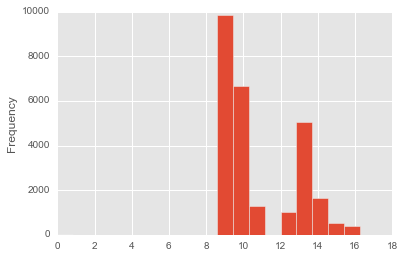

In [36]:
df.education_num.plot(kind = 'hist', range = (0, 18), bins = 21)

Education ranges from highschool grad to doctorate.

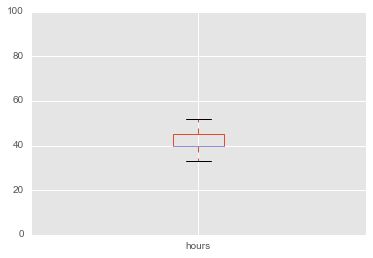

In [37]:
df.hours.plot(kind = 'box')

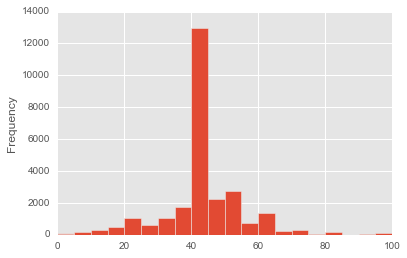

In [38]:
df.hours.plot(kind = 'hist', range = (0, 100), bins = 20)

In [39]:
df.hours.max()
# Someone worked 99 hours...

99

In [40]:
df.hours.min()

1

Variable | Range of Variable
---|---
`age` | 17-90
`race` | 1-5
`hours_per_week` | 1-99
`education_num` | 1-8
`sex` | 1: Female , 2: Male
`marital_status` | 1: Married , 2: Unmarried
`salary` | 0: <=$50,000, 1: >$50,000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b54d610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f922c50>]], dtype=object)

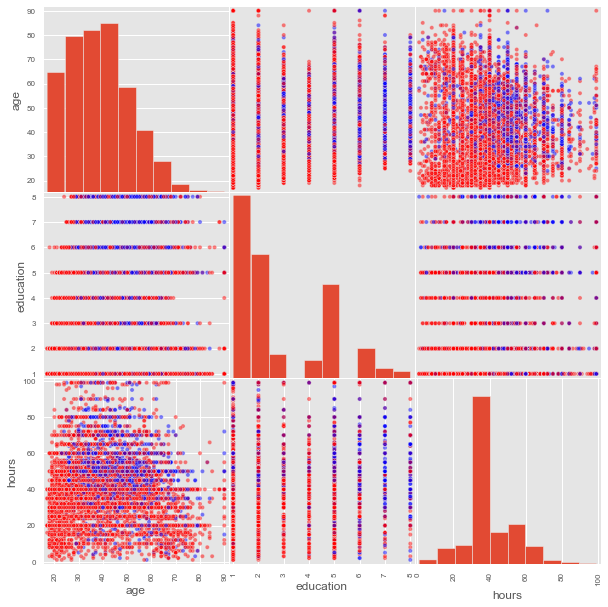

In [41]:
color_wheel = {"<=50K": "red",
               ">50K": "blue"}

color = df.income.map(color_wheel)

pd.tools.plotting.scatter_matrix(df[['age', 'education', 'hours']], c=color, s=70, figsize = (10,10))

# QQ Plots for Normality

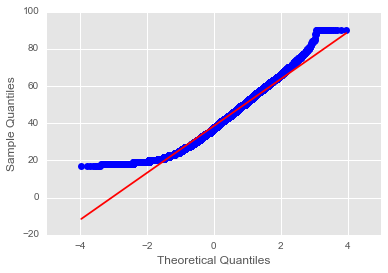

In [42]:
sm.qqplot(df.age, line = 's')

pass

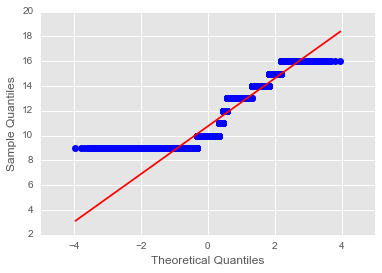

In [43]:
sm.qqplot(df.education_num, line = 's')

pass

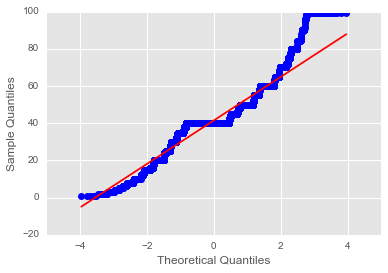

In [44]:
sm.qqplot(df.hours, line = 's')

pass

# One-Hot Encoding on Education

In [45]:
education_df = pd.get_dummies(df.education, prefix = 'education')
 
education_df.rename(columns = {'education_1.0': 'education_1',
                              'education_2.0': 'education_2',
                              'education_3.0': 'education_3',
                              'education_4.0': 'education_4',
                              'education_5.0': 'education_5',
                              'education_6.0': 'education_6',
                              'education_7.0': 'education_7',
                              'education_8.0': 'education_8'}, inplace = True)
 
education_df.head()

,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df = df[ ['income_binary', 'age', 'sex', 'race', 'hours', 'marital_status'] ].join(education_df)
 
df.head()

,income_binary,age,sex,race,hours,marital_status,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8
1,0,82,1,1,18,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,41,1,1,40,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,34,1,1,45,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,74,1,1,20,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,68,1,1,40,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression with StatsModel

In [47]:
model = smf.logit(formula = 'income_binary ~ age + sex + race + hours + marital_status + education_2 + education_3 + education_4 + education_5 + education_6 + education_7 + education_8', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.407362
         Iterations 7


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          income_binary   No. Observations:                26421
Model:                          Logit   Df Residuals:                    26408
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Nov 2016   Pseudo R-squ.:                  0.3081
Time:                        20:19:38   Log-Likelihood:                -10763.
converged:                       True   LL-Null:                       -15557.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.4715      0.152     -9.694      0.000        -1.769    -1.174
age                0.0328      0.001     22.139      0.000         0.030     0.036
sex                0.1622      0.047      3.476      0.001         0.071     0.254
race              -0.0751      0.017     -4.326      0.000        -0.109    -0.041
hours              0.0301      0.002     19.450      0.000         0.027     0.033
marital_status    -2.2637      0.044    -50.993      0.000        -2.351    -2.177
education_2        0.5048      0.047     10.841      0.000         0.414     0.596
education_3        0.6952      0.078      8.942      0.000         0.543     0.848
education_4        0.8236      0.090      9.194      0.000         0.648     0.999
education_5        1.5624      0.047     33.448      0.000         1.471     1.654
education_6        2.0346      0.069     29.679      0.000         1.900     2.169
education_7        2.6900      0.122     22.074      0.000         2.451     2.929
education_8        2.6108      0.143     18.257      0.000         2.330     2.891
==================================================================================
"""

In [49]:
np.exp(model.params)

Intercept          0.229579
age                1.033323
sex                1.176063
race               0.927656
hours              1.030589
marital_status     0.103969
education_2        1.656610
education_3        2.004064
education_4        2.278711
education_5        4.770462
education_6        7.649499
education_7       14.732235
education_8       13.609399
dtype: float64

In [50]:
predict_X = pd.DataFrame({'intercept': [1, 1, 1, 1, 1, 1, 1, 1],
    'age': [40, 40, 40, 40, 40, 40, 40, 40],
    'sex': [1, 1, 1, 1, 1, 1, 1, 1], #female
    'race': [1, 1, 1, 1, 1, 1, 1, 1], #white
    'hours': [40, 40, 40, 40, 40, 40, 40, 40],
    'marital_status': [1, 1, 1, 1, 1, 1, 1, 1], #married
    'education_2': [0, 1, 0, 0, 0, 0, 0, 0],
    'education_3': [0, 0, 1, 0, 0, 0, 0, 0],
    'education_4': [0, 0, 0, 1, 0, 0, 0, 0],
    'education_5': [0, 0, 0, 0, 1, 0, 0, 0],
    'education_6': [0, 0, 0, 0, 0, 1, 0, 0],
    'education_7': [0, 0, 0, 0, 0, 0, 1, 0],
    'education_8': [0, 0, 0, 0, 0, 0, 0, 1]})
 
predict_X

,age,education_2,education_3,education_4,education_5,education_6,education_7,education_8,hours,intercept,marital_status,race,sex
0,40,0,0,0,0,0,0,0,40,1,1,1,1
1,40,1,0,0,0,0,0,0,40,1,1,1,1
2,40,0,1,0,0,0,0,0,40,1,1,1,1
3,40,0,0,1,0,0,0,0,40,1,1,1,1
4,40,0,0,0,1,0,0,0,40,1,1,1,1
5,40,0,0,0,0,1,0,0,40,1,1,1,1
6,40,0,0,0,0,0,1,0,40,1,1,1,1
7,40,0,0,0,0,0,0,1,40,1,1,1,1


In [51]:
model.predict(predict_X)

array([ 0.24385298,  0.34821449,  0.39257691,  0.42358823,  0.60605817,
        0.71155943,  0.82611899,  0.81443514])

A 40-year old, married female with a highschool degree has a 24% probability of making $50K; and as education levels increase, the probabilities increase to 35%, 39%, and 42%, 61%, 71%, 83%, 81% respectively. 

# Logistic Regression with SKLearn

In [52]:
X = df[ ['age', 'sex', 'race',  'hours',  'marital_status',  'education_2',  'education_2',  'education_3',  'education_4',  'education_5',  'education_6',  'education_7',  'education_8'] ]
y = df.income_binary
 
model = linear_model.LogisticRegression(C = 10 ** 2).fit(X, y)

In [53]:
model.score(X, y)

0.79849362249725597

In [54]:
predict_X

,age,education_2,education_3,education_4,education_5,education_6,education_7,education_8,hours,intercept,marital_status,race,sex
0,40,0,0,0,0,0,0,0,40,1,1,1,1
1,40,1,0,0,0,0,0,0,40,1,1,1,1
2,40,0,1,0,0,0,0,0,40,1,1,1,1
3,40,0,0,1,0,0,0,0,40,1,1,1,1
4,40,0,0,0,1,0,0,0,40,1,1,1,1
5,40,0,0,0,0,1,0,0,40,1,1,1,1
6,40,0,0,0,0,0,1,0,40,1,1,1,1
7,40,0,0,0,0,0,0,1,40,1,1,1,1


In [55]:
predict_X.drop('intercept', axis = 1, inplace = True)

In [56]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [57]:
model.predict_proba(predict_X[ ['age', 'sex', 'race',  'hours',  'marital_status',  'education_2',  'education_2',  'education_3',  'education_4',  'education_5',  'education_6',  'education_7',  'education_8'] ])

array([[ 0.75543006,  0.24456994],
       [ 0.65083515,  0.34916485],
       [ 0.60574089,  0.39425911],
       [ 0.57678165,  0.42321835],
       [ 0.39294944,  0.60705056],
       [ 0.28743084,  0.71256916],
       [ 0.17446508,  0.82553492],
       [ 0.18478775,  0.81521225]])

In [58]:
model.score(test_X, test_y)

0.7938310152332293

A 40-year old, married female with a highschool degree has a 24% probability of making $50K; and as education levels increase, the probabilities increase to 35%, 39%, and 42%, 61%, 71%, 83%, 82% respectively. These results are very similar to the ones of the statsmodels-based model.

# Decision Tree & Random Forest

In [59]:
#df = df[ ['income_binary', 'age', 'sex', 'race', 'hours', 'marital_status', 'education'] ]
#df.head()

In [60]:
X = df[df.columns.values]
y = df.income_binary

X.drop('income_binary', axis = 1, inplace = True)



In [61]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [62]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(train_X, train_y)

In [63]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.78009084559318564

In [64]:
model.score(test_X, test_y)

0.77613776137761381

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#%install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
%load_ext gvmagic

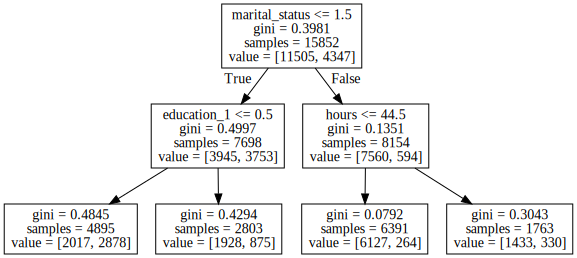

In [66]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [67]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.80498119541224433, 'marital_status'),
 (0.16025789454258568, 'education_1'),
 (0.034760910045170103, 'hours'),
 (0.0, 'sex'),
 (0.0, 'race'),
 (0.0, 'education_8'),
 (0.0, 'education_7'),
 (0.0, 'education_6'),
 (0.0, 'education_5'),
 (0.0, 'education_4'),
 (0.0, 'education_3'),
 (0.0, 'education_2'),
 (0.0, 'age')]

Random Forest

In [72]:
model = ensemble.RandomForestClassifier(n_estimators = 1000,
        max_features = 2,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(train_X, train_y)

In [69]:
model.oob_score_

0.80305324249306076

In [70]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.80368475832430941

In [71]:
model.score(test_X, test_y)

0.80338726464187715